In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Dataset-20240827T051357Z-001/Copy of healthcare-dataset-stroke-data2.csv')
sns.set(style="whitegrid")

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# Create a contingency table between 'smoking_status' and 'stroke'
contingency_table = pd.crosstab(df['smoking_status'], df['stroke'])

In [ ]:
# Perform the Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

In [ ]:
# Display the results
print("Chi-Square Test Results:")
print(f"Chi2 Statistic: {chi2}")
print(f"p-value: {p_value}")
print(f"Degrees of Freedom: {dof}")

Chi-Square Test Results:
Chi2 Statistic: 29.147269191399264
p-value: 2.0853997025008455e-06
Degrees of Freedom: 3


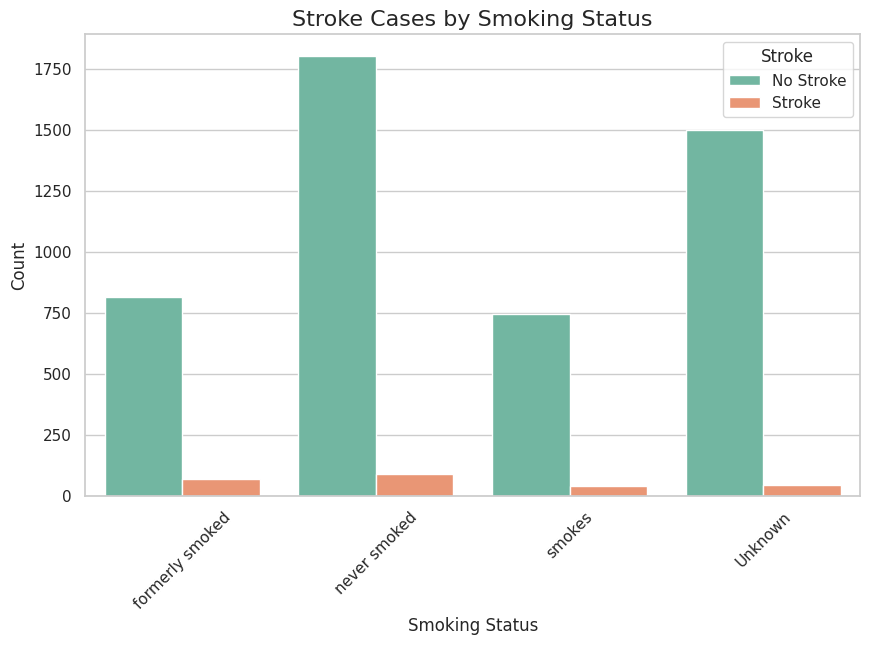

In [ ]:
#Visualization for Chi-Square Test: Bar Plot of 'smoking_status' vs 'stroke'
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.countplot(data=df, x='smoking_status', hue='stroke', palette='Set2')

plt.title("Stroke Cases by Smoking Status", fontsize=16)
plt.xlabel("Smoking Status", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Stroke", labels=["No Stroke", "Stroke"])
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Stratified Sampling
# Perform stratified sampling with 20% of the data, stratified by the 'stroke' column
stratified_sample = df.groupby('stroke', group_keys=False).apply(
    lambda x: x.sample(frac=0.2, random_state=42)
)

<ipython-input-13-0b40391ba9b3>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = df.groupby('stroke', group_keys=False).apply(


In [ ]:
# Display sample size and stroke distribution in the sample
print("\nStratified Sample Results:")
print(f"Sample Size: {stratified_sample.shape}")
print("Stroke Distribution in Sample:")
print(stratified_sample['stroke'].value_counts())


Stratified Sample Results:
Sample Size: (1022, 12)
Stroke Distribution in Sample:
stroke
0    972
1     50
Name: count, dtype: int64


In [ ]:
# Stratified Sample Distribution
sns.countplot(data=stratified_sample, x='stroke', ax=axes[1], palette='coolwarm')
axes[1].set_title("Stratified Sample Stroke Distribution", fontsize=14)
axes[1].set_xlabel("Stroke", fontsize=12)
axes[1].set_xticklabels(["No Stroke", "Stroke"])

plt.tight_layout()
plt.show()

<ipython-input-21-4722a6bacaf9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=stratified_sample, x='stroke', ax=axes[1], palette='coolwarm')
<ipython-input-21-4722a6bacaf9>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(["No Stroke", "Stroke"])


<Figure size 640x480 with 0 Axes>

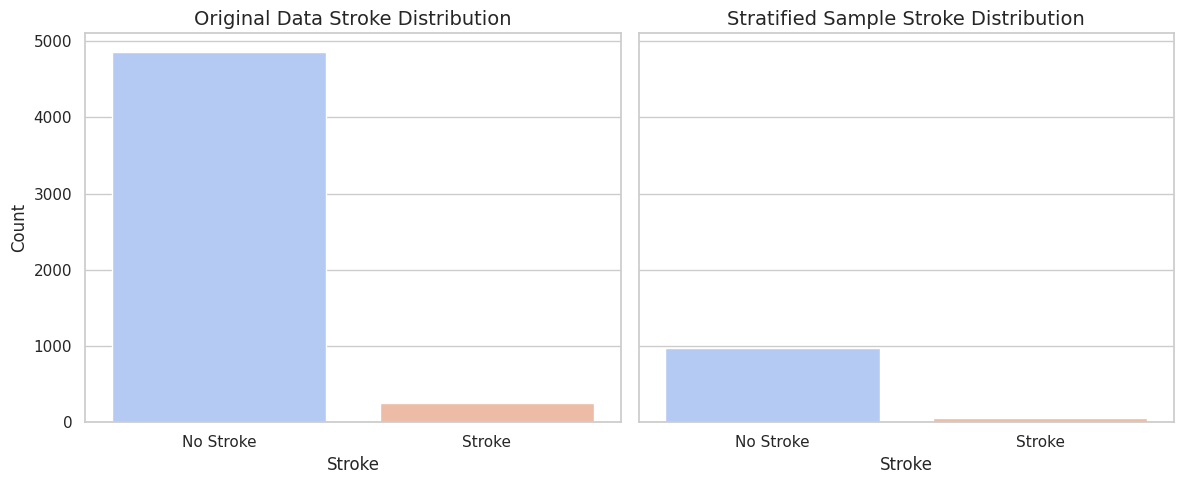

In [ ]:
# Create subplots for original and sample data distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot 1: Original Data Stroke Distribution
sns.countplot(data=df, x='stroke', ax=axes[0], palette='coolwarm', hue='stroke', dodge=False, legend=False)
axes[0].set_title("Original Data Stroke Distribution", fontsize=14)
axes[0].set_xlabel("Stroke", fontsize=12)
axes[0].set_ylabel("Count", fontsize=12)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["No Stroke", "Stroke"])

# Plot 2: Stratified Sample Stroke Distribution
sns.countplot(data=stratified_sample, x='stroke', ax=axes[1], palette='coolwarm', hue='stroke', dodge=False, legend=False)
axes[1].set_title("Stratified Sample Stroke Distribution", fontsize=14)
axes[1].set_xlabel("Stroke", fontsize=12)
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(["No Stroke", "Stroke"])

# Adjust layout for better fit
plt.tight_layout()
plt.show()